##  Nächste-Nachbarn-Klassifikation mit sklearn

### Einführung 

<img width="90%"  src="../images/sklearn_text_with_animals_nearest_neighbor.webp" srcset="../images/sklearn_text_with_animals_nearest_neighbor_800w.webp 800w,../images/sklearn_text_with_animals_nearest_neighbor_700w.webp 700w,../images/sklearn_text_with_animals_nearest_neighbor_600w.webp 600w,../images/sklearn_text_with_animals_nearest_neighbor_500w.webp 500w,../images/sklearn_text_with_animals_nearest_neighbor_400w.webp 400w,../images/sklearn_text_with_animals_nearest_neighbor_350w.webp 350w,../images/sklearn_text_with_animals_nearest_neighbor_300w.webp 300w" alt="sklearn text with  animals" />

Die zugrundeliegenden Konzepte des K-Nächsten-Nachbarn-Klassifikators (KNN) finden Sie im Kapitel [Nächste-Nachbarn-Klassifikation] (naechste_nachbarn_klassifikation.php) unseres Tutorials über Maschinelles Lernen. In diesem Kapitel zeigten wir auch einfache Funktionen, die in Python geschrieben wurden, um die grundlegenden Prinzipien zu demonstrieren.

Anstatt diese Funktionen zu nutzen, - obwohl sie beeindruckende Ergebnisse zeigten, - empfehlen wir, die Funktionalitäten des `sklearn-Moduls` zu verwenden. 


### kNN-Klassifikatoren von sklearn

`neighbors` ist ein Paket des `sklearn` module, 
welches Funktionalitäten für Nächste-Nachbarn-Klassifikatoren
zur Verfügung stellt. 

Die Klassen in `sklearn.neighbors` können sowohl 
numpy arrays als auch scipy.sparse-Matrizen als 
Eingabe verarbeiten. 
Für dichte  Matrizen werden eine große Anzahl 
möglicher Entfernungsmetriken unterstützt. 
Für dünnbesetzte Matrizen werden beliebige 
Minkowski-Metriken für Suchvorgänge unterstützt.


*scikit-learn* implementiert zwei verschiedene 
nächste-Nachbarn-Klassifikatoren: 
    
<dl>
  <dt>K-Nächster-Nachbar</dt>
  <dd>basiert auf den k-nächsten Nachbarn der Stichprobe, die zu klassifizieren sind. 
Der Wert `k` ist ein vom Benutzer spezifizierter Wert. Dies ist der am häufigsten engewendete Klassifikator der beiden.</dd>

  <dt>Radius-Nächster-Nachbar</dt>
  <dd>basiert auf der Anzahl der Nachbarn einer Stichprobe innerhalb eines festen Umkreises `r`. `r` ist eine von den Anwendenden zu bestimmende `flot`-Zahl. Dieser Klassifikationtyp wird seltener angewendet.</dd>
</dl>


#### KNeighborsClassifier

Wir erstellen einen künstlichen Datensatz mit drei Klassen, um den K-Nächster Nachbarnklassifizierer `KNeighborsClassifier` von `sklearn.neighbors` testen. 

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 3], [5, 5], [7, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=50, 
                          centers=np.array(centers),
                          random_state=1)

Let us visualize what we have created:

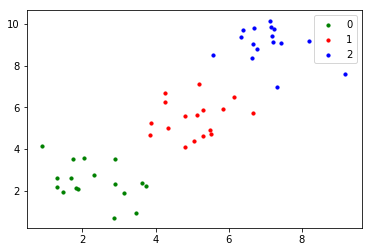

In [5]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))



ax.legend(loc='upper right');

Wir sind nun bereit die Klassifikation mit `kNeighborsClassifier` durchzuführen:

In [6]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(data, labels) 
KNeighborsClassifier(algorithm='auto', 
                     leaf_size=30, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=5, 
                     p=2,
                     weights='uniform')

predicted = knn.predict(data)
print("Ergebnisse der Klassifikation:")
print(predicted)
print("Sollwerte:")
print(labels)

Ergebnisse der Klassifikation:
[2 1 2 0 0 1 1 2 2 1 0 2 0 1 1 0 0 0 0 1 2 0 2 1 2 2 1 1 2 0 0 0 0 0 2 2 2
 2 0 0 1 2 1 1 1 1 1 1 0 1]
Sollwerte:
[2 1 2 0 0 2 1 2 2 1 0 2 0 1 1 0 0 0 0 1 2 0 2 1 2 2 1 1 2 0 0 0 0 0 2 2 2
 2 0 0 1 2 1 1 1 1 1 1 0 1]


Um das Ergebnis zu evaluieren benötigen wir die Funktion `accuracy_score` aus dem Modul `sklearn.metrics`. Um zu sehen, wie sie arbeitet, benutzen wir folgendes kleines Beispiel:

In [7]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3, 2]
y_true = [0, 1, 2, 3, 2]
print(accuracy_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred, normalize=False))

0.6
3


Der erste Aufruf von `accuracy_score` liefert `0.6` zurück, was bedeutet, dass 60% der Stichproben korrekt bestimmt wurden. Der Parameter `normalize` wurde per Default auf `True` gesetzt. Beim zweiten Aufruf setzen wir `normalize` auf `False`. Dies bedeutet, dass wir die Anzahl der Elemente erhalten, die korrekt vorhergesagt worden waren.

Nun sind wir bereit, unsere Ergebnisse aus der Klassifizierung des vorigen Beispiels zu bewerten: 

In [8]:
print(accuracy_score(predicted, labels))

0.98


In [10]:
data[:5], labels[:5]

(array([[7.19829972, 9.11900865],
        [5.05080775, 4.36300435],
        [6.32933771, 9.37756379],
        [1.47182825, 1.92703138],
        [1.6775828 , 2.61594565]]), array([2, 1, 2, 0, 0]))

Im folgenden Beispiel benutzen wir den Iris-Datensatz:

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
data, labels = iris.data, iris.target

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res 

In [13]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels) 
KNeighborsClassifier(algorithm='auto', 
                     leaf_size=30, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=5, 
                     p=2,         # p=2 is equivalent to euclidian distance
                     weights='uniform')

print("Ergebnisse der Klassifikation:")
test_data_predicted = knn.predict(test_data)
print(test_data_predicted)
print("Sollwerte:")
print(test_labels)

Ergebnisse der Klassifikation:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Sollwerte:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [14]:
print(accuracy_score(test_data_predicted, test_labels))

1.0


In [15]:
print("Ergebnisse der Klassifikation:")
learn_data_predicted = knn.predict(train_data)
print(learn_data_predicted)
print("Sollwerte:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))

Ergebnisse der Klassifikation:
[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 2 1 2 2 2 2 1 0 0 2 2 0 0 0 2
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 1 0 1 2]
Sollwerte:
[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]
0.9666666666666667


#### RadiusNeighborsClassifier

Die Arbeitsweise des k-Nächsten-Nachbarnklassifikators besteht darin, einen Kreis um die zu klassifizierende Stichprobe zu bestimmen der genau k Elemente enthält. Der Radius-Nachbarn-Klassifikator hingegen hat eine feste Länge für den Radius des umgebenden Kreis. Es lokalisiert alle Elemente in den Trainingsdaten, die sich innerhalb dieses Kreis mit der angegebenen Radiuslänge befinden. Als Folge des festen Radiusansatzes bieten dichte Regionen der Stichprobenverteilung mehr Informationen und `sparse` Regionen bieten weniger Informationen, was sich oft als vorteilhaft erweist. 

In [16]:
from sklearn.neighbors import RadiusNeighborsClassifier

X = [[0, 1], [0.5, 1], [3, 1], [3, 2], [1.3, 0.8], [2.5, 2.5]]
y = [0, 0, 1, 1, 0, 1]

neigh = RadiusNeighborsClassifier(radius=1.0)
neigh.fit(X, y)

print(neigh.predict([[1.5, 1.2]]))

print(neigh.predict([[3.1, 2.1]]))

[0]
[1]


In [17]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 3], [5, 5], [7, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=155, 
                          centers=np.array(centers),
                          cluster_std = 1.3,
                          random_state=1)


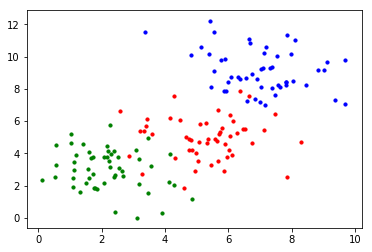

In [18]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))

In [19]:
rnn = RadiusNeighborsClassifier(radius=0.5)
rnn.fit(data, labels)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, outlier_label=None, p=2,
             radius=0.5, weights='uniform')

In [20]:
predicted = rnn.predict(data)

In [21]:
print(accuracy_score(predicted, labels))

0.9741935483870968


Nun wollen wir dies mit dem k-Nächsten-Nachbarn-Klassifikator vergleichen:

In [24]:
knn = KNeighborsClassifier()
knn.fit(data, labels) 
KNeighborsClassifier(algorithm='auto', 
                     leaf_size=30, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=6, 
                     p=2,         # p=2 is equivalent to euclidian distance
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [25]:
predicted = knn.predict(data)
print(accuracy_score(predicted, labels))

0.9354838709677419
